<a href="https://colab.research.google.com/github/2000vishnu/Mini-Project/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 2.5 ms (started: 2021-05-20 14:18:31 +00:00)


In [2]:
!pip install bing-image-downloader

time: 3.04 s (started: 2021-05-20 14:18:35 +00:00)


In [3]:
!mkdir images


time: 116 ms (started: 2021-05-20 14:18:41 +00:00)


In [6]:
from bing_image_downloader import downloader
downloader.download("pretty sunflower",limit=30,output_dir="images",adult_filter_off=True )



[!!]Indexing page: 1

[%] Indexed 8 Images on Page 1.


[%] Downloading Image #1 from https://media.phillyvoice.com/media/images/sunflower_090819.2e16d0ba.fill-1200x630-c0.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.pinimg.com/736x/0e/b5/63/0eb5635680546f8bb7bc618ad0e55489.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://66.media.tumblr.com/44d35612a2a7601c2f8c8d35cf820193/tumblr_nqalbc4ywM1rwrn5zo1_500.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://cooldigitalphotography.com/wp-content/uploads/2013/11/Sunflower8.jpg
[!] Issue getting: http://cooldigitalphotography.com/wp-content/uploads/2013/11/Sunflower8.jpg
[!] Error:: [Errno 104] Connection reset by peer
[%] Downloading Image #4 from http://www.wallpapers13.com/wp-content/uploads/2015/12/Sunflower-Field-Sunset-Beautiful-Wallpaper-HD-Flowers-Sunflower-Field.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://www.saphireeventgroup.com/wp-content/uploads/files/6314/

In [7]:
import numpy as np
a=np.array([[1,2,3,4,5],
            [4,5,6,7,8]])
a.ndim

2

time: 6.16 ms (started: 2021-05-20 14:20:16 +00:00)


In [8]:
a.flatten()

array([1, 2, 3, 4, 5, 4, 5, 6, 7, 8])

time: 11.4 ms (started: 2021-05-20 14:20:18 +00:00)


In [9]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR ="/content/images"
CATEGORIES = ["pretty sunflower","rugby ball leather","ice cream corn"]

for category in CATEGORIES:
  class_num=CATEGORIES.index(category)
  path=os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)


time: 1min 46s (started: 2021-05-20 14:20:20 +00:00)


In [10]:
len(flat_data[0])

67500

time: 5.55 ms (started: 2021-05-20 14:22:12 +00:00)


In [11]:
150*150*3

67500

time: 5.1 ms (started: 2021-05-20 14:22:15 +00:00)


In [12]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

time: 4.31 ms (started: 2021-05-20 14:22:16 +00:00)


<BarContainer object of 3 artists>

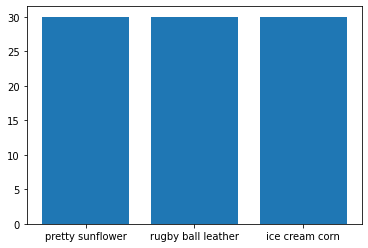

time: 200 ms (started: 2021-05-20 14:22:19 +00:00)


In [13]:
unique,count=np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,
                                       test_size=0.3,random_state=109)

time: 195 ms (started: 2021-05-20 14:22:22 +00:00)


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc =svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 1min 46s (started: 2021-05-20 14:22:25 +00:00)


In [16]:
y_pred=clf.predict(x_test)
y_pred

array([0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 2, 1, 2, 1, 0, 1, 0, 2,
       2, 0, 0, 0, 0])

time: 193 ms (started: 2021-05-20 14:24:54 +00:00)


In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 1.22 ms (started: 2021-05-20 14:25:11 +00:00)


In [20]:
accuracy_score(y_pred,y_test)

0.7777777777777778

time: 4.39 ms (started: 2021-05-20 14:25:15 +00:00)


In [22]:
confusion_matrix(y_pred,y_test)

array([[8, 4, 2],
       [0, 7, 0],
       [0, 0, 6]])

time: 5.9 ms (started: 2021-05-20 14:25:22 +00:00)


In [23]:
import pickle
pickle.dump(clf,open("img_model.p","wb"))


time: 36.3 ms (started: 2021-05-20 14:25:24 +00:00)


In [24]:
model=pickle.load(open("img_model.p","rb"))

time: 29 ms (started: 2021-05-20 14:25:26 +00:00)


enter your URLhttps://preppywallpapers.com/wp-content/uploads/2019/08/Sunflower-iPhone-Wallpaper-6.jpg
(1308, 736, 3)
PREDICTED OUTPUT: pretty sunflower


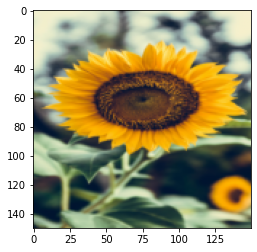

time: 34.2 s (started: 2021-05-20 14:25:28 +00:00)


In [25]:
flat_data = []
url = input('enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3)) 
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f"PREDICTED OUTPUT: {y_out}")

In [26]:
!pip install streamlit
!pip install pyngrok==4.1.1
from pyngrok import ngrok

     |████████████████████████████████| 8.2MB 12.4MB/s 
     |████████████████████████████████| 112kB 47.9MB/s 
     |████████████████████████████████| 174kB 42.3MB/s 
     |████████████████████████████████| 81kB 7.6MB/s 
     |████████████████████████████████| 92kB 8.6MB/s 
     |████████████████████████████████| 4.2MB 41.8MB/s 
     |████████████████████████████████| 71kB 7.5MB/s 
     |████████████████████████████████| 122kB 43.4MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13448 sha256=b2ca1bc75e8b22f22420d8f2921d9afa77456c20672ba067f012c70c344345de
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.
  Found existing installation: click 8.0.0
    Uninstalling click-8.0.0:
      Successfully uninstalled click-8.0.0
  Found existing installation: ipykernel 4.

  Created wheel for pyngrok: filename=pyngrok-4.1.1-cp37-none-any.whl size=15971 sha256=6c2ddcf846ecdf5e5a201172102f5814b32f0616bf281ed08f1060e6107b8def
  Stored in directory: /root/.cache/pip/wheels/97/71/0d/1695f7c8815c0beb3b5d9b35d6eec9243c87e6070fbe3977fa
Successfully built pyngrok
time: 17.7 s (started: 2021-05-20 14:26:07 +00:00)


In [28]:
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image 
st.title("image classifier using machine learning")
st.text("upload the image")
model=pickle.load(open("img_model.p","rb"))
uploaded_file=st.file_uploader("choosen an image...",type="jpg")
if uploaded_file is not None:
  img=Image.open(uploaded_file)
  st.image(img,caption="uploaded image")
  if st.button("PREDICT"):
    CATEGORIES = ["pretty sunflower","rugby ball leather","ice cream corn"]
    st.write("result...")
    flat_data=[]
    img=np.array(img)
    img_resized = resize(img,(150,150,3)) 
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    y_out=model.predict(flat_data)
    y_out=CATEGORIES[y_out[0]]
    st.title(f"PREDICTED OUTPUT: {y_out}")
    q=model.predict_proba(flat_data)
    for index, item in enumerate(CATEGORIES):
      st.write(f"{item} :{q[0][index]*100}%")




Overwriting app.py
time: 2.57 ms (started: 2021-05-20 14:26:38 +00:00)


In [29]:
!nohup streamlit run app.py &
url=ngrok.connect(port="8501")
url


nohup: appending output to 'nohup.out'


'http://08312e86af2e.ngrok.io'

time: 4.98 s (started: 2021-05-20 14:26:41 +00:00)
